# Importing Libraries

In [41]:
import json
import tqdm
from operator import itemgetter
import random
import matplotlib.pyplot as plt
import os
import cv2

# Loading Data

In [2]:
def getAllAnswer(answers_list):
	"""
	Joins a list of answers by ";" to a single string
	
	Input:
		answer_list: list of answers (there are 10 answers for every question)

	Returns:
		A string in the format "ans1;ans2;...;ans10"
	"""
	answers = []
	for i in range(len(answers_list)):
		answers.append(answers_list[i]['answer'])
	return ';'.join(answers)

In [26]:
DATA_FOLDER = './content'

def process_question_annotation(subset):
    """
    Creates a JSON file whose elements are (image_path, question, answer, answers)
    from the Questions and Annotations files.

    Input:
      subset: subset can be "train2014" or "val2014"

    Returns:
      None
    """
    anno = json.load(open(f'../content/v2_mscoco_{subset}_annotations.json', 'r'))
    ques = json.load(open(f'../content/v2_OpenEnded_mscoco_{subset}_questions.json', 'r'))
    imdir='../content/%s/COCO_%s_%012d.jpg' ## COCO_train2014_000000291417.jpg
    data = []

    for i in tqdm.tqdm(range(len(anno['annotations']))):
        image_path = imdir%(subset, subset, anno['annotations'][i]['image_id'])
        question = ques['questions'][i]['question']
        ans = anno['annotations'][i]['multiple_choice_answer']
        answer_list = getAllAnswer(anno['annotations'][i]['answers'])
        data.append({'img_path': image_path, 'question': question, 'ans': ans, 'answers': answer_list})

    json.dump(data, open(f'../content/vqa_raw_{subset}.json', 'w'))

In [27]:
subset = ['train2014', 'val2014']

for x in subset:
    process_question_annotation(x)

100%|██████████| 214354/214354 [00:00<00:00, 297736.16it/s]


In [28]:
train_data = json.load(open(f'../content/vqa_raw_train2014.json', 'r'))
val_data = json.load(open(f'../content/vqa_raw_val2014.json', 'r'))

# EDA

In [29]:
ques = list(map(itemgetter('question'), train_data))
ans = list(map(itemgetter('ans'), train_data))
image_list = list(map(itemgetter('img_path'), train_data))

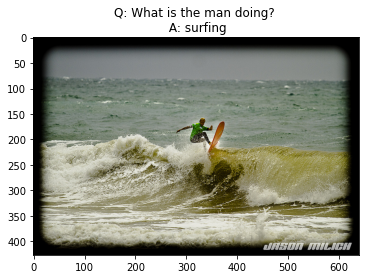

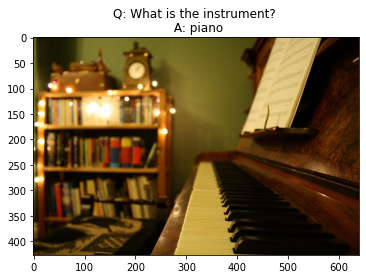

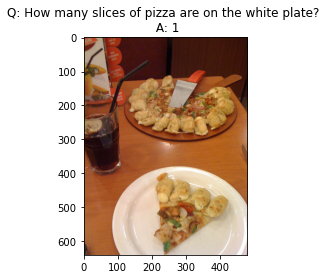

In [33]:
# https://stackoverflow.com/a/41210974
def process(index, image_file, question, answer):
    image = plt.imread(image_file[index])
    plt.figure()
    plt.title(f'Q: {question[index]} \n A: {answer[index]}')
    plt.imshow(image)

idx = random.sample(range(0, len(image_list)), 3)
for i in idx:
    process(i, image_list, ques, ans)

In [40]:
image_files = os.listdir('../content/train2014')
image_info = []

for image_file in (image_files):
  img = cv2.imread(os.path.join('../content/train2014/',image_file))
  image_info.append(img.shape)